# Représentation de signaux

- Ubuntu, lancer un terminal et taper "jupyter lab" (avec un y)
- Présentation de Python:
  - langage de plus en plus répandu, pas seulement scientifique
  - Anaconda = distribution avec python, modules, logiciels (IDE)
  - Notre IDE : Jupyter Notebook/Lab
  - Notebook (d'où Jupyter) : cellules, peuvent s'exécuter dans n'importe quel ordre
    (exemple : a=1 / a=a+1 / print(a)) + markdown (et utilité : commentaires, rapports)

Par convention, les importations de modules sont faites en début de notebook.

In [1]:
import numpy as np                    # Calcul et fonctions scientifiques
import matplotlib.pyplot as plt       # Affichage

In [2]:
import matplotlib as mpl
mpl.rcParams['axes.grid'] = True

## Signal sinusoïdal

On modifie le code de l'énoncé...

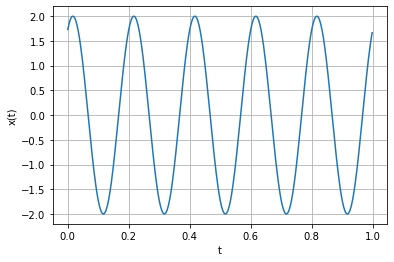

In [3]:
# Vecteur des abscisses : un point tous les 2 ms entre 0 et 1 s
t = np.arange(0, 1, 2e-3)

# Paramètres
A = 2
f = 5
phi = np.pi/3

# Sinusoïde
x = A * np.sin(2*np.pi*f*t + phi)

# Affichage
plt.plot(t, x)
plt.xlabel("t")
plt.ylabel("x(t)")
plt.show()

**Pour faire un zoom : `pip install ipympl` puis `%matplotlib ipympl`.**

## Sinusoïde amortie

De nouveau, on s'inspire du code précédent...

L'exponentielle (`numpy.exp`) et le sinus sont calculés en deux instructions pour plus de clarté.

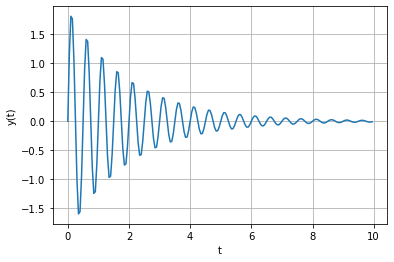

In [4]:
# Vecteur des abscisses : un point tous les 0,05 s entre 0 et 10 s
t = np.arange(0, 10, .05)

# Paramètres
A = 2
a = 0.5
f = 2

# Sinusoïde amortie
expo = np.exp(-a*t)
sinus = np.sin(2*np.pi*f*t)
y = A * expo * sinus

# Affichage
plt.plot(t,y)
plt.xlabel("t")
plt.ylabel("y(t)")
plt.show()

Quelle est l'influence des paramètres ?

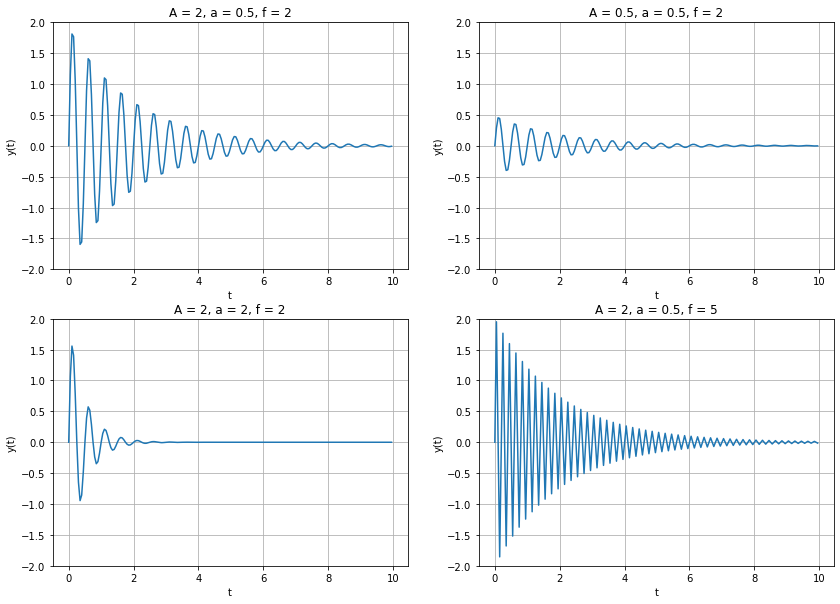

In [5]:
A = [  2, .5, 2,  2 ]
a = [ .5, .5, 2, .5 ]
f = [  2,  2, 2,  5 ]

plt.figure(figsize=(14,10))

for i in range(len(A)):
    y = A[i] * np.exp(-a[i]*t) * np.sin(2*np.pi*f[i]*t)
    plt.subplot(2,2,i+1)
    plt.plot(t,y)
    plt.ylim([-2, 2])
    plt.xlabel("t")
    plt.ylabel("y(t)")
    plt.title(f"A = {A[i]}, a = {a[i]}, f = {f[i]}")
    
plt.show()

## Porte

N'oubliez pas : une porte ou une impulsion peuvent être définies avec `numpy.where`.

On veut tracer :

$$
\begin{align*}
z[n]
&= A\,\mathrm{rect}\left(\frac{n-m}{N}\right) \\
&= \begin{cases}
    A &\text{si}\quad \left|\frac{n-m}{N}\right| \leq \frac{1}{2} \\
    0 &\text{si}\quad \left|\frac{n-m}{N}\right| > \frac{1}{2}
   \end{cases} \\
&= \begin{cases}
    A &\text{si}\quad m-\frac{N}{2} \leq n \leq m+\frac{N}{2} \\
    0 &\text{sinon}
   \end{cases}
\end{align*}
$$

Donc avec $A=3$, $m=4$ et $N=5$, le signal $z$ est égal à $3$ entre $1,5$ et $6,5$.

On peut donc définir une porte entre $2$ et $6$ ou, si on est plus malin et fainéant,
recopier la définition du signal porte en redéfinissant le vecteur des abscisses.

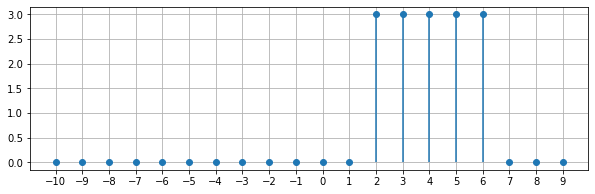

In [6]:
# paramètres
A, m, N = 3, 4, 5

# Abscisses
n = np.arange(-10, 10)

# Signal
n2 = (n-m) / N
z = 3 * np.where( (n2>=-.5) & (n2<=.5) , 1, 0)

# Affichage
plt.figure(figsize=(10,3))
plt.stem(n, z, basefmt=" ")
plt.xticks(n)
plt.show()

## Concentration de CO<sub>2</sub>

Chargement des données avec la fonction `numpy.loadtxt`, en précisant que la première ligne est à éviter, et que les données sont délimitées par une virgule.

In [7]:
X = np.loadtxt("world-co2.csv", skiprows=1, delimiter=",")
print(X.shape)

(1875, 2)


Il y a 1875 enregistrements sur deux colonnes, lesquelles correspondent aux années et à la concentration en CO<sub>2</sub> atmosphérique, à l'échelle mondiale, mesurée en parties par million (ppm) (Source : Our World in Data, [Atmospheric concentrations of CO2 continue to rise](https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions#atmospheric-concentrations-of-co2-continue-to-rise)).

On peut donc représenter sur différentes échelles de temps l'évolution de ce gaz à effet de serre.

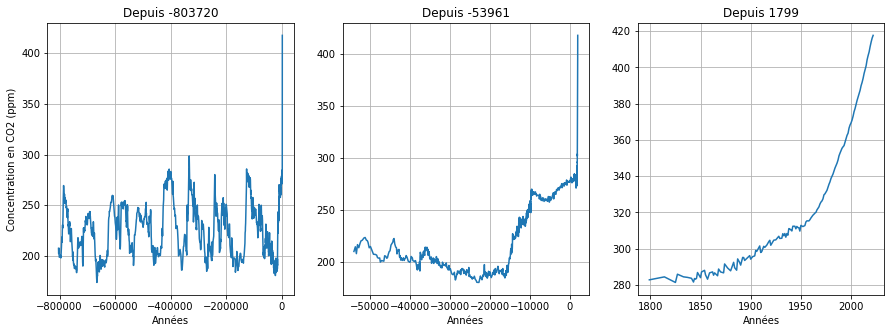

In [8]:
idx = [0, 1000, 1730]
N = len(idx)
fig, axs = plt.subplots(1,N, figsize=(15,5))
for n in range(N):
    i = idx[n]
    axs[n].plot(X[i:,0], X[i:,1])
    axs[n].set_title( f"Depuis {X[i,0]:.0f}" )
    axs[n].set_xlabel( f"Années" )
    axs[n].set_title( f"Depuis {X[i,0]:.0f}" )
    if n==0:
        axs[n].set_ylabel( f"Concentration en CO2 (ppm)" )
plt.show()